In [ ]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import plot_yearly
from fbprophet.plot import plot_weekly
from prophet.diagnostics import cross_validation, performance_metrics
from fbprophet import Prophet

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
df=pd.read_csv("/content/ASELS Geçmiş Verileri (5).csv")

In [ ]:
df['Şimdi'] = df['Şimdi'].str.replace(',', '.')
df['Açılış'] = df['Açılış'].str.replace(',', '.')
df['Yüksek'] = df['Yüksek'].str.replace(',', '.')
df['Düşük'] = df['Düşük'].str.replace(',', '.')
df['Hac.'] = df['Hac.'].str.replace(',', '.')
df['Fark %'] = df['Fark %'].str.replace(',', '.')

# Facebook Prophet 

Facebook Prophet is an open-source forecasting library developed by Facebook's Core Data Science team. It is designed to make it easier for analysts and developers to produce high-quality time series forecasts, even if they have limited experience with time series analysis.

Prophet is built on top of a decomposable time series model with three main components: trend, seasonality, and holidays. The trend component models non-periodic changes in the time series, such as growth or decline. The seasonality component models periodic changes, such as daily, weekly, or monthly patterns. The holiday component allows the user to specify custom events or holidays that are expected to impact the time series.

Prophet has several key features that make it a powerful forecasting tool:

Automatic changepoint detection: Prophet uses a Bayesian change point detection algorithm to identify points in the time series where the trend changes. This allows it to automatically adapt to changes in the data, such as shifts in trend or seasonality.

Flexible modeling of seasonality: Prophet can handle multiple types of seasonality, including daily, weekly, monthly, and yearly patterns. It also allows the user to specify custom seasonalities, such as a quarterly pattern.

Robust to missing data and outliers: Prophet is designed to handle missing data and outliers in the time series. It uses a robust regression model to estimate the trend, which is less sensitive to outliers than traditional regression models.

Interpretable results: Prophet provides interpretable results, including trend and seasonality plots, as well as the contribution of each component to the forecast. This makes it easy for analysts to understand and communicate the results of the forecast.

Prophet is implemented in Python and is built on top of the popular data analysis library Pandas. It also integrates with other Python libraries, such as Matplotlib and Scikit-learn, to provide a complete data analysis and forecasting workflow.

Overall, Prophet is a powerful forecasting tool that is designed to be accessible to a wide range of users, from data analysts to developers. Its automatic changepoint detection, flexible modeling of seasonality, and robustness to missing data and outliers make it a valuable addition to any time series forecasting workflow.

In [ ]:
df.tail()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
1994,20.03.2015,2.95,2.90,2.98,2.89,3.79M,2.08%
1995,19.03.2015,2.89,2.90,2.91,2.83,3.35M,0.35%
1996,18.03.2015,2.88,2.90,2.91,2.83,1.55M,-0.69%
1997,17.03.2015,2.90,2.92,2.94,2.89,2.22M,-0.34%
1998,16.03.2015,2.91,2.85,2.94,2.84,3.22M,3.19%


In [ ]:
# Define the figure to be used to draw the graph
fig = go.Figure(data=[go.Candlestick(x=df['Tarih'],   # Set the x-axis to be the Date column
                open=df['Açılış'],     
                high=df['Yüksek'],     
                close=df['Şimdi'])])   

# reverse order x-axis dates
fig.update_xaxes(type='category', categoryorder='array', categoryarray=df['Tarih'][::-1])

fig.show()

In [ ]:
df['Tarih'] = pd.to_datetime(df['Tarih'])

In [ ]:
df=df.sort_values(by='Tarih')
df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
1986,2015-01-04,2.97,2.95,2.98,2.95,904.82K,0.68%
1946,2015-01-06,3.29,3.37,3.43,3.29,2.98M,-2.37%
1924,2015-01-07,3.43,3.39,3.43,3.35,3.17M,2.08%
1881,2015-01-09,3.41,3.43,3.43,3.37,899.96K,-1.16%
1861,2015-01-10,3.39,3.36,3.40,3.34,2.14M,2.11%
...,...,...,...,...,...,...,...
6,2023-09-03,58.25,57.50,58.45,56.85,67.85M,2.28%
44,2023-10-01,58.15,59.10,60.80,57.30,118.78M,-1.61%
5,2023-10-03,56.70,57.95,58.65,56.60,49.31M,-2.66%
43,2023-11-01,52.80,58.20,59.60,52.60,101.98M,-9.20%


In [ ]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [ ]:
df['Tarih'] = pd.to_datetime(df['Tarih'])


In [ ]:
# Creating a Prophet model
model = Prophet(weekly_seasonality=True,yearly_seasonality=True)
model.add_seasonality(name='monthly', period=30, fourier_order=5)
model.add_country_holidays(country_name='TR')

# Make the column names fit the Prophet model
df_prophet = df.rename(columns={'Tarih': 'ds', 'Şimdi': 'y'})

# Determination of training data
train = df_prophet.iloc[:-30]

# Determination of test data
test = df_prophet.iloc[-30:]

# Train the model
model.fit(train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


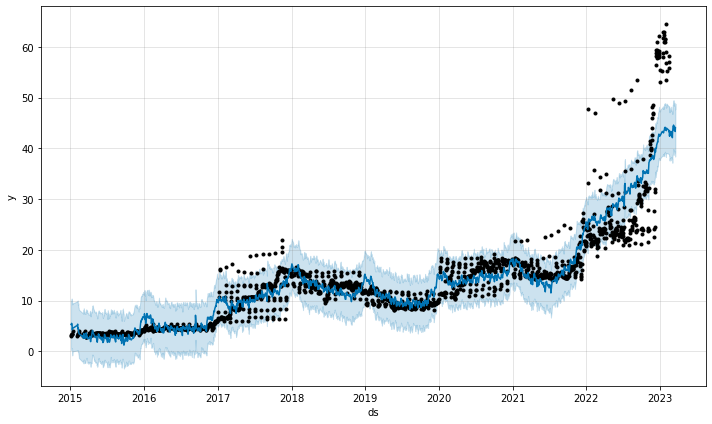

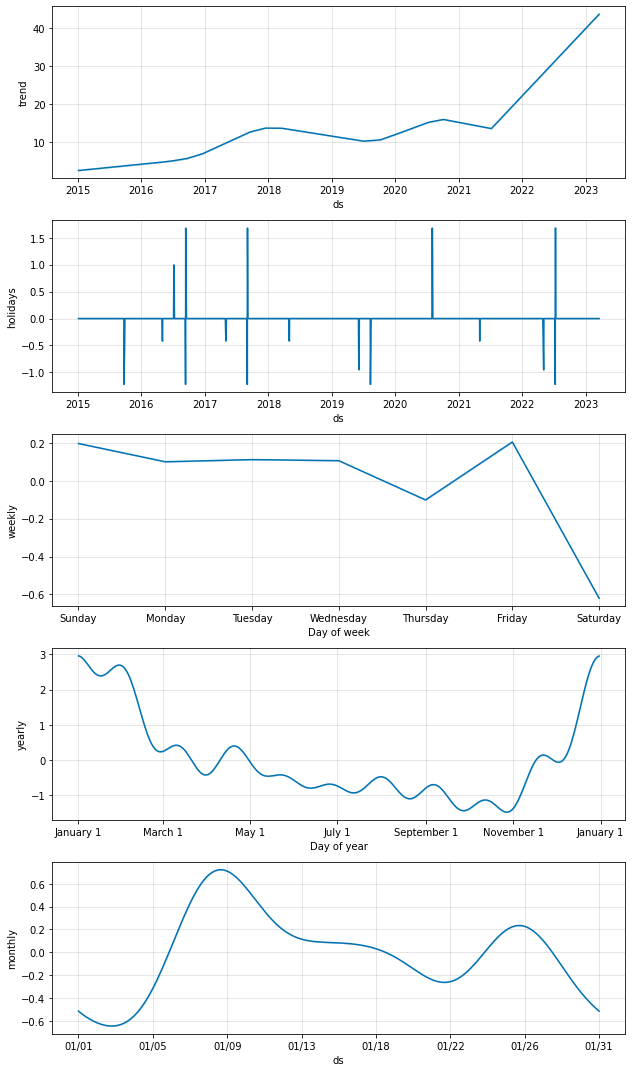

In [ ]:
# Creating dataframes for future dates
future = model.make_future_dataframe(periods=30, include_history=True)

# Generating forecasts
forecast = model.predict(future)

# Visualization of forecasts and actual values
fig1 = model.plot(forecast)

# A separate visualization to look at the components of the forecasts separately
fig2 = model.plot_components(forecast)


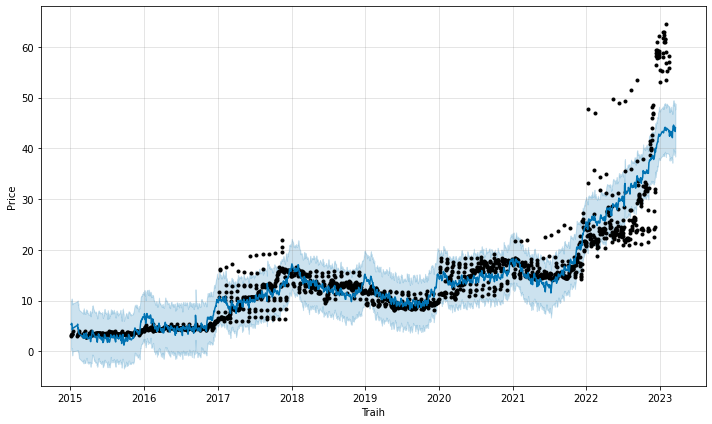

In [ ]:
# View estimated prices
fig3 = model.plot(forecast, xlabel='Traih', ylabel='Price')
fig3.show()

In [ ]:
df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
1986,2015-01-04,2.97,2.95,2.98,2.95,904.82K,0.68%
1946,2015-01-06,3.29,3.37,3.43,3.29,2.98M,-2.37%
1924,2015-01-07,3.43,3.39,3.43,3.35,3.17M,2.08%
1881,2015-01-09,3.41,3.43,3.43,3.37,899.96K,-1.16%
1861,2015-01-10,3.39,3.36,3.40,3.34,2.14M,2.11%
...,...,...,...,...,...,...,...
6,2023-09-03,58.25,57.50,58.45,56.85,67.85M,2.28%
44,2023-10-01,58.15,59.10,60.80,57.30,118.78M,-1.61%
5,2023-10-03,56.70,57.95,58.65,56.60,49.31M,-2.66%
43,2023-11-01,52.80,58.20,59.60,52.60,101.98M,-9.20%


In [ ]:
# Evaluation of the model
df_cv = cross_validation(model, initial='900 days', period='90 days', horizon='90 days')
df_p = performance_metrics(df_cv)
print(df_p)


INFO:prophet:Making 22 forecasts with cutoffs between 2017-09-16 00:00:00 and 2022-11-19 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

   horizon        mse      rmse       mae      mape     mdape     smape  \
0  10 days  16.275356  4.034273  2.357566  0.127298  0.081816  0.129334   
1  11 days  17.571770  4.191869  2.372326  0.126051  0.082001  0.128110   
2  12 days  16.857354  4.105771  2.381440  0.129010  0.083594  0.129922   
3  13 days  15.293716  3.910718  2.296052  0.127681  0.085944  0.129134   
4  14 days  12.921908  3.594706  2.125355  0.122252  0.086552  0.123575   
..     ...        ...       ...       ...       ...       ...       ...   
76 86 days  37.027658  6.085036  3.830709  0.214593  0.199943  0.218131   
77 87 days  36.690569  6.057274  3.843870  0.216375  0.199943  0.217148   
78 88 days  34.077046  5.837555  3.787240  0.212180  0.199943  0.213003   
79 89 days  31.799075  5.639067  3.790628  0.212771  0.201022  0.214089   
80 90 days  29.940331  5.471776  3.822980  0.217827  0.199861  0.217468   

    coverage  
0   0.696026  
1   0.712551  
2   0.699248  
3   0.687343  
4   0.699248  
..       

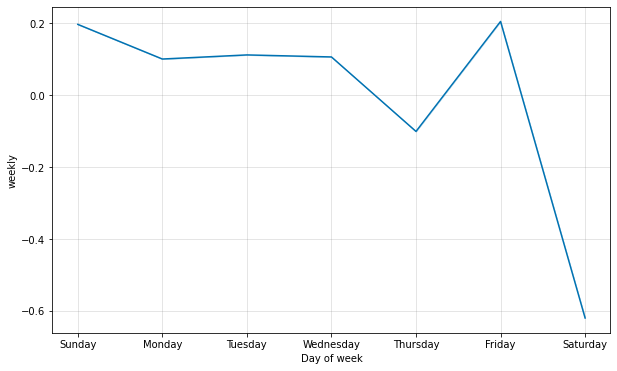

In [ ]:
weekly_effects = plot_weekly(model)

plt.show()

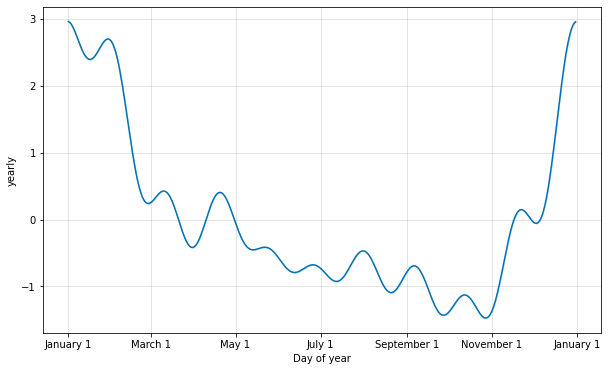

In [ ]:
yearly_effects = plot_yearly(model)


plt.show()

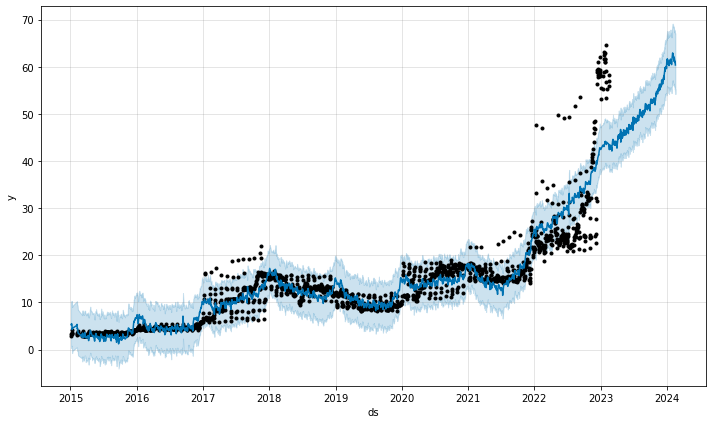

In [ ]:
# Visualizing forecasts up to 2024
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig6 = model.plot(forecast)
fig6.show()


In [ ]:
# Evaluating the performance of the model with the cross validation method using the time series model
df_cv = cross_validation(model, initial='900 days', period='90 days', horizon = '90 days')

# Assigning the results to the df_p variable by calculating the performance metrics
df_p = performance_metrics(df_cv)


print(df_p)


INFO:prophet:Making 22 forecasts with cutoffs between 2017-09-16 00:00:00 and 2022-11-19 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

   horizon        mse      rmse       mae      mape     mdape     smape  \
0  10 days  16.275356  4.034273  2.357566  0.127298  0.081816  0.129334   
1  11 days  17.571770  4.191869  2.372326  0.126051  0.082001  0.128110   
2  12 days  16.857354  4.105771  2.381440  0.129010  0.083594  0.129922   
3  13 days  15.293716  3.910718  2.296052  0.127681  0.085944  0.129134   
4  14 days  12.921908  3.594706  2.125355  0.122252  0.086552  0.123575   
..     ...        ...       ...       ...       ...       ...       ...   
76 86 days  37.027658  6.085036  3.830709  0.214593  0.199943  0.218131   
77 87 days  36.690569  6.057274  3.843870  0.216375  0.199943  0.217148   
78 88 days  34.077046  5.837555  3.787240  0.212180  0.199943  0.213003   
79 89 days  31.799075  5.639067  3.790628  0.212771  0.201022  0.214089   
80 90 days  29.940331  5.471776  3.822980  0.217827  0.199861  0.217468   

    coverage  
0   0.696026  
1   0.719491  
2   0.706767  
3   0.694862  
4   0.699248  
..       

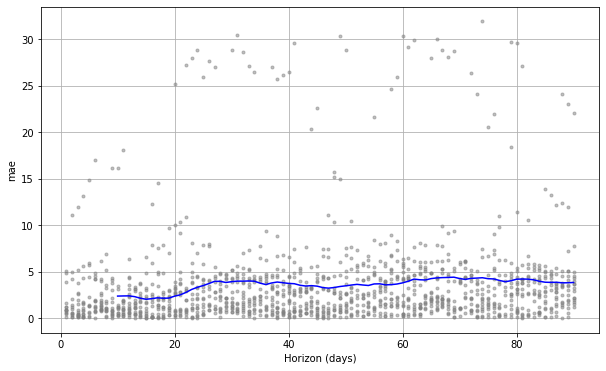

In [ ]:
# Plotting a graph using performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mae')


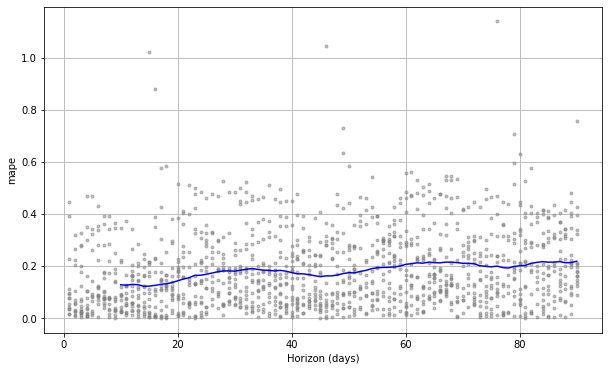

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

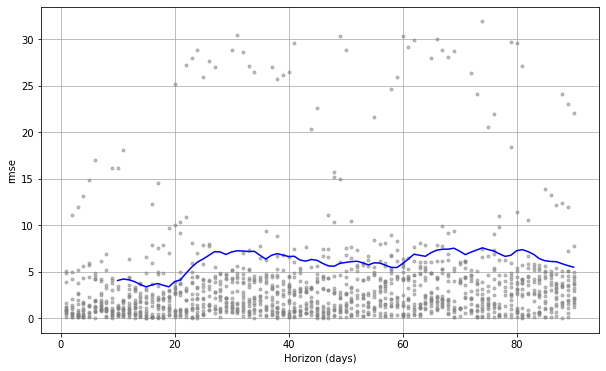

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

mse: 38.609160994228645


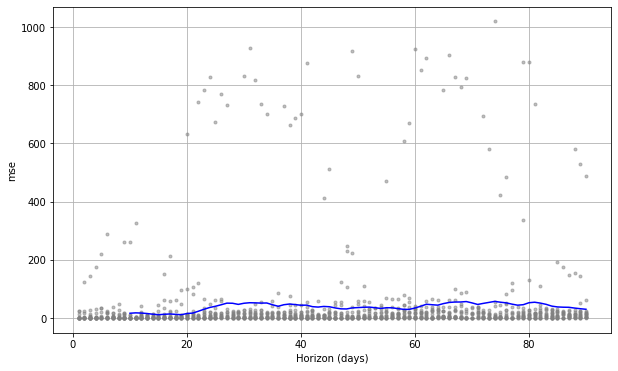

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mse')
mse = df_p['mse'].mean()
print("mse:", mse)

In [ ]:
mape_mean = df_p['mape'].mean()
print("Ortalama MAPE değeri:", mape_mean)

Ortalama MAPE değeri: 0.18211485913038736


In [ ]:
df_p = performance_metrics(df_cv)
print('R-kare değeri:', 1 - df_p['mape'].mean())

R-kare değeri: 0.8178851408696126


In [ ]:
# Show the component modes of the time series model
model.component_modes

{'additive': ['monthly',
  'yearly',
  'weekly',
  "New Year's Day",
  "National Sovereignty and Children's Day",
  'Labour Day',
  'Commemoration of Ataturk, Youth and Sports Day',
  'Victory Day',
  'Republic Day',
  'Ramadan Feast',
  'Ramadan Feast Holiday',
  'Sacrifice Feast',
  'Sacrifice Feast Holiday',
  'Democracy and National Unity Day',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,"Commemoration of Ataturk, Youth and Sports Day","Commemoration of Ataturk, Youth and Sports Day_lower","Commemoration of Ataturk, Youth and Sports Day_upper",Democracy and National Unity Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,2.388858,0.306127,9.963469,2.388858,2.388858,0.0,0.0,0.0,0.0,...,0.196926,0.196926,0.196926,2.905014,2.905014,2.905014,0.0,0.0,0.0,5.274511
1,2015-01-06,2.397954,0.682308,10.316619,2.397954,2.397954,0.0,0.0,0.0,0.0,...,0.111955,0.111955,0.111955,2.818677,2.818677,2.818677,0.0,0.0,0.0,5.435735
2,2015-01-07,2.402502,0.641370,10.293762,2.402502,2.402502,0.0,0.0,0.0,0.0,...,0.106314,0.106314,0.106314,2.766770,2.766770,2.766770,0.0,0.0,0.0,5.499155
3,2015-01-09,2.411598,0.805845,10.292377,2.411598,2.411598,0.0,0.0,0.0,0.0,...,0.205018,0.205018,0.205018,2.656435,2.656435,2.656435,0.0,0.0,0.0,5.334612
4,2015-01-10,2.416146,-0.752577,9.023212,2.416146,2.416146,0.0,0.0,0.0,0.0,...,-0.619863,-0.619863,-0.619863,2.602254,2.602254,2.602254,0.0,0.0,0.0,4.246379
